In [34]:
!pip install -q google-generativeai

In [35]:
import google.generativeai as genai
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

In [36]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

In [33]:
# # Import the genai library
# import google.generativeai as genai

# # Delete the specified tuned model
# genai.delete_tuned_model('tunedModels/wildlife-tuned-model-3833')

In [37]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [50]:
import google.generativeai as genai
import json
import random

name = f'wildlife-tuned-model-{random.randint(0,10000)}'
operation = genai.create_tuned_model(

    source_model=base_model.name,
    training_data = [
    {               #input will be the scientific name of any species and the output will be the json fromat having identifiedName,ScientificName, commonName, Description, Habitat, characteristics[3 in small words], conservationStatus, and PrimaryImage.
        "text_input": "tyrannus-tyrannus",
        "output": json.dumps({
            "identifiedName": "Eastern Kingbird",
            "ScientificName": "Tyrannus tyrannus",
            "commonName": "Eastern Kingbird",
            "Description": "Aggressive flycatcher with white-tipped tail.",
            "Habitat": "Open areas with scattered trees and shrubs.",
            "Characteristics": [
                "Aerial insectivore",
                "Aggressive territorial behavior",
                "Migratory species"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://www.allaboutbirds.org/guide/assets/photo/60346971-480px.jpg"
        })
    },
    {
        "text_input": "ursus-arctos-horribilis",
        "output": json.dumps({
            "identifiedName": "Grizzly Bear",
            "ScientificName": "Ursus arctos horribilis",
            "commonName": "Grizzly Bear",
            "Description": "Large brown bear with distinctive shoulder hump.",
            "Habitat": "Forests, alpine meadows, and tundra regions.",
            "Characteristics": [
                "Omnivorous diet",
                "Hibernates in winter",
                "Strong swimmer"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://www.nwf.org/-/media/NEW-WEBSITE/Shared-Folder/Wildlife/Mammals/mammal_grizzly-bear.ashx"
        })
    },
    {
        "text_input": "ovis-canadensis",
        "output": json.dumps({
            "identifiedName": "Bighorn Sheep",
            "ScientificName": "Ovis canadensis",
            "commonName": "Bighorn Sheep",
            "Description": "Mountain-dwelling sheep with large curved horns.",
            "Habitat": "Rocky mountains and desert regions.",
            "Characteristics": [
                "Excellent climber",
                "Rams engage in head-butting",
                "Herbivorous grazer"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://www.fs.usda.gov/sites/default/files/styles/large/public/bighorn-sheep.jpg"
        })
    },
    {
        "text_input": "panthera-leo",
        "output": json.dumps({
            "identifiedName": "Lion",
            "ScientificName": "Panthera leo",
            "commonName": "Lion",
            "Description": "Large social cat with a majestic mane.",
            "Habitat": "Savannas, grasslands, and open woodlands.",
            "Characteristics": [
                "Lives in prides",
                "Apex predator",
                "Roars to communicate"
            ],
            "conservationStatus": "Vulnerable",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/7/73/Lion_waiting_in_Namibia.jpg"
        })
    },
    {
        "text_input": "mimus-polyglottos",
        "output": json.dumps({
            "identifiedName": "Northern Mockingbird",
            "ScientificName": "Mimus polyglottos",
            "commonName": "Northern Mockingbird",
            "Description": "Gray bird known for mimicking other sounds.",
            "Habitat": "Open areas, forest edges, and urban regions.",
            "Characteristics": [
                "Mimics various sounds",
                "Territorial singer",
                "Omnivorous diet"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://www.allaboutbirds.org/guide/assets/photo/60346971-480px.jpg"
        })
    },
    {
        "text_input": "monodon-monoceros",
        "output": json.dumps({
            "identifiedName": "Narwhal",
            "ScientificName": "Monodon monoceros",
            "commonName": "Narwhal",
            "Description": "Arctic whale with a long spiral tusk.",
            "Habitat": "Arctic Ocean and surrounding seas.",
            "Characteristics": [
                "Males have long tusks",
                "Deep divers",
                "Social in pods"
            ],
            "conservationStatus": "Near Threatened",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/6/65/Narwhals_breach.jpg"
        })
    },
    {
        "text_input": "musca-domestica",
        "output": json.dumps({
            "identifiedName": "Housefly",
            "ScientificName": "Musca domestica",
            "commonName": "Housefly",
            "Description": "Common fly found near human habitation.",
            "Habitat": "Urban and rural areas worldwide.",
            "Characteristics": [
                "Rapid breeder",
                "Spreads diseases",
                "Short lifespan"
            ],
            "conservationStatus": "Not Evaluated",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/6/6f/Musca_domestica_housefly.jpg"
        })
    },
    {
        "text_input": "odobenus-rosmarus",
        "output": json.dumps({
            "identifiedName": "Walrus",
            "ScientificName": "Odobenus rosmarus",
            "commonName": "Walrus",
            "Description": "Large marine mammal with prominent tusks.",
            "Habitat": "Arctic sea ice and coastal regions.",
            "Characteristics": [
                "Thick blubber",
                "Social herds",
                "Feeds on benthic invertebrates"
            ],
            "conservationStatus": "Vulnerable",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/3/3e/Odobenus_rosmarus_divergens_-_Kamogawa_Sea_World_2.jpg"
        })
    },
    {
        "text_input": "ursus-maritimus",
        "output": json.dumps({
            "identifiedName": "Polar Bear",
            "ScientificName": "Ursus maritimus",
            "commonName": "Polar Bear",
            "Description": "Large white bear adapted to Arctic life.",
            "Habitat": "Arctic sea ice and coastal areas.",
            "Characteristics": [
                "Excellent swimmer",
                "Carnivorous diet",
                "Thick insulating fur"
            ],
            "conservationStatus": "Vulnerable",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/e/e3/Ursus_maritimus_Polar_bear_with_cub.jpg"
        })
    },
    {
        "text_input": "varanus-komodoensis",
        "output": json.dumps({
            "identifiedName": "Komodo Dragon",
            "ScientificName": "Varanus komodoensis",
            "commonName": "Komodo Dragon",
            "Description": "World's largest lizard with venomous bite.",
            "Habitat": "Indonesian islands of Komodo, Rinca, and Flores.",
            "Characteristics": [
                "Apex predator",
                "Forked tongue",
                "Ambush hunter"
            ],
            "conservationStatus": "Endangered",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/1/1f/Komodo_dragon_with_tongue.jpg"
        })
    },
    {
        "text_input": "ara-macao",
        "output": json.dumps({
            "identifiedName": "Scarlet Macaw",
            "ScientificName": "Ara macao",
            "commonName": "Scarlet Macaw",
            "Description": "Vibrant red, yellow, and blue tropical parrot.",
            "Habitat": "Humid evergreen forests of Central and South America.",
            "Characteristics": [
                "Brightly colored plumage",
                "Strong beak for cracking nuts",
                "Monogamous mating behavior"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/4/4e/Ara_macao_-in_tree-8a.jpg"
        })
    },
    {
        "text_input": "architeuthis-dux",
        "output": json.dumps({
            "identifiedName": "Giant Squid",
            "ScientificName": "Architeuthis dux",
            "commonName": "Giant Squid",
            "Description": "Elusive deep-sea squid with massive size.",
            "Habitat": "Deep ocean waters worldwide, typically 200–1000 meters.",
            "Characteristics": [
                "Largest invertebrate",
                "Huge eyes for deep-sea vision",
                "Long feeding tentacles"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/4/4c/Giant_squid.jpg"
        })
    },
    {
        "text_input": "panthera-pardus",
        "output": json.dumps({
            "identifiedName": "Leopard",
            "ScientificName": "Panthera pardus",
            "commonName": "Leopard",
            "Description": "Solitary and stealthy big cat with a spotted coat.",
            "Habitat": "Sub-Saharan Africa, Northeast Africa, Central Asia, India, China.",
            "Characteristics": [
                "Excellent climber",
                "Nocturnal hunter",
                "Spotted fur"
            ],
            "conservationStatus": "Vulnerable",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/1/1e/Leopard_africa.jpg"
        })
    },
    {
        "text_input": "gorilla-gorilla",
        "output": json.dumps({
            "identifiedName": "Western Gorilla",
            "ScientificName": "Gorilla gorilla",
            "commonName": "Western Gorilla",
            "Description": "The largest living primate, gentle and social.",
            "Habitat": "Lowland tropical forests of Central Africa.",
            "Characteristics": [
                "Live in groups",
                "Herbivorous diet",
                "Endangered"
            ],
            "conservationStatus": "Critically Endangered",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/0/06/Gorilla_gorilla_001.jpg"
        })
    },
    {
        "text_input": "ailuropoda-melanoleuca",
        "output": json.dumps({
            "identifiedName": "Giant Panda",
            "ScientificName": "Ailuropoda melanoleuca",
            "commonName": "Giant Panda",
            "Description": "Large black-and-white bear native to south central China.",
            "Habitat": "Mountainous regions in central China.",
            "Characteristics": [
                "Bamboo diet",
                "Distinctive coloring",
                "Solitary"
            ],
            "conservationStatus": "Vulnerable",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/0/0f/Grosser_Panda.JPG"
        })
    },
    {
        "text_input": "chelonia-mydas",
        "output": json.dumps({
            "identifiedName": "Green Sea Turtle",
            "ScientificName": "Chelonia mydas",
            "commonName": "Green Sea Turtle",
            "Description": "Large sea turtle of tropical and subtropical oceans.",
            "Habitat": "Coastal areas, bays, and lagoons.",
            "Characteristics": [
                "Herbivorous as adults",
                "Migratory",
                "Endangered"
            ],
            "conservationStatus": "Endangered",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/2/2e/Green_sea_turtle_in_Kona.JPG"
        })
    },
    {
        "text_input": "meleagris-gallopavo",
        "output": json.dumps({
            "identifiedName": "Wild Turkey",
            "ScientificName": "Meleagris gallopavo",
            "commonName": "Wild Turkey",
            "Description": "Large, ground-dwelling bird native to North America.",
            "Habitat": "Woodlands, grasslands, and forests.",
            "Characteristics": [
                "Fan-shaped tail",
                "Ground forager",
                "Polygamous"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/3/32/Wild_turkey_Meleagris_gallopavo.jpg"
        })
    },
    {
        "text_input": "canis-lupus",
        "output": json.dumps({
            "identifiedName": "Gray Wolf",
            "ScientificName": "Canis lupus",
            "commonName": "Gray Wolf",
            "Description": "Largest member of the dog family, lives and hunts in packs.",
            "Habitat": "Forests, tundra, grasslands, deserts.",
            "Characteristics": [
                "Pack hunter",
                "Vocal communicator",
                "Highly adaptive"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/6/6c/Canis_lupus_laying.jpg"
        })
    },
    {
        "text_input": "pavo-cristatus",
        "output": json.dumps({
            "identifiedName": "Indian Peafowl",
            "ScientificName": "Pavo cristatus",
            "commonName": "Peacock",
            "Description": "Large, colorful bird with an extravagant tail.",
            "Habitat": "Indian subcontinent, open forests and farmlands.",
            "Characteristics": [
                "Spectacular display",
                "Omnivorous",
                "National bird of India"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/1/18/Peacock_Plumage.jpg"
        })
    },
    {
        "text_input": "delphinus-delphis",
        "output": json.dumps({
            "identifiedName": "Common Dolphin",
            "ScientificName": "Delphinus delphis",
            "commonName": "Common Dolphin",
            "Description": "Highly social and acrobatic oceanic dolphin.",
            "Habitat": "Warm-temperate and tropical oceans worldwide.",
            "Characteristics": [
                "Social pods",
                "Leaps and spins",
                "Vocal communication"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/b/bd/Common_dolphin_noaa.jpg"
        })
    },

    {
        "text_input": "averrhoa-carambola",
        "output": json.dumps({
            "identifiedName": "Starfruit",
            "ScientificName": "Averrhoa carambola",
            "commonName": "Starfruit",
            "Description": "Tropical fruit with a distinctive star shape when sliced.",
            "Habitat": "Tropical Southeast Asia, cultivated worldwide in warm climates.",
            "Characteristics": [
                "Rich in vitamin C",
                "Edible tart-sweet fruit",
                "Used in juices and salads"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/f/f4/Carambola_%28Starfruit%29.jpg"
        })
    },
    {
        "text_input": "cordyline-fruticosa",
        "output": json.dumps({
            "identifiedName": "Ti Plant",
            "ScientificName": "Cordyline fruticosa",
            "commonName": "Ti Plant",
            "Description": "Colorful foliage plant often used in landscaping and traditional medicine.",
            "Habitat": "Tropical Asia and Pacific Islands.",
            "Characteristics": [
                "Showy leaves",
                "Cultural significance",
                "Medicinal and ornamental uses"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/5/53/Starr_050407-5218_Cordyline_fruticosa.jpg"
        })
    },
    {
        "text_input": "paederia-tomentosa",
        "output": json.dumps({
            "identifiedName": "Skunkvine",
            "ScientificName": "Paederia tomentosa",
            "commonName": "Skunkvine",
            "Description": "Climbing plant with medicinal uses; leaves emit a strong odor.",
            "Habitat": "Tropical Asia.",
            "Characteristics": [
                "Climbing habit",
                "Traditional medicine",
                "Distinct odor"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/e/e0/Paederia_tomentosa_Blanco2.468-cropped.jpg"
        })
    },
    {
        "text_input": "piper-betle",
        "output": json.dumps({
            "identifiedName": "Betel Leaf",
            "ScientificName": "Piper betle",
            "commonName": "Betel Leaf",
            "Description": "Heart-shaped leaf chewed in many Asian cultures for its stimulating effect.",
            "Habitat": "Tropical Asia.",
            "Characteristics": [
                "Heart-shaped leaves",
                "Mild stimulant",
                "Used in traditional rituals"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/7/7e/Piper_betle_Leaves_05.jpg"
        })
    },
    {
        "text_input": "piper-sarmentosum",
        "output": json.dumps({
            "identifiedName": "Wild Betel Leaf",
            "ScientificName": "Piper sarmentosum",
            "commonName": "Wild Betel Leaf",
            "Description": "Herbaceous plant with aromatic leaves used in Southeast Asian cooking.",
            "Habitat": "Southeast Asia.",
            "Characteristics": [
                "Aromatic leaves",
                "Edible foliage",
                "Medicinal properties"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/7/70/Piper_sarmentosum.JPG"
        })
    },
    {
        "text_input": "polyscias-fruticosa",
        "output": json.dumps({
            "identifiedName": "Ming Aralia",
            "ScientificName": "Polyscias fruticosa",
            "commonName": "Ming Aralia",
            "Description": "A decorative shrub grown as an ornamental and medicinal plant.",
            "Habitat": "Tropical Asia.",
            "Characteristics": [
                "Fine-textured leaves",
                "Easy to shape",
                "Used in folk medicine"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/1/10/Polyscias_fruticosa_-_Ming_Aralia.jpg"
        })
    },
    {
        "text_input": "stachytarpheta-jamaicensis",
        "output": json.dumps({
            "identifiedName": "Blue Porterweed",
            "ScientificName": "Stachytarpheta jamaicensis",
            "commonName": "Blue Porterweed",
            "Description": "Perennial herb with blue flowers, used in traditional medicine.",
            "Habitat": "Tropical Americas and Asia.",
            "Characteristics": [
                "Blue flower spikes",
                "Attracts pollinators",
                "Medicinal herb"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/6/6e/Stachytarpheta_jamaicensis2.jpg"
        })
    },
    {
        "text_input": "aloe-vera",
        "output": json.dumps({
            "identifiedName": "Aloe Vera",
            "ScientificName": "Aloe vera",
            "commonName": "Aloe Vera",
            "Description": "Succulent plant well-known for its soothing gel.",
            "Habitat": "Cultivated worldwide, native to Arabian Peninsula.",
            "Characteristics": [
                "Fleshy leaves",
                "Medicinal gel",
                "Used in cosmetics"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/e/e1/Aloe_vera_flower.JPG"
        })
    },
    {
        "text_input": "curcuma-longa",
        "output": json.dumps({
            "identifiedName": "Turmeric",
            "ScientificName": "Curcuma longa",
            "commonName": "Turmeric",
            "Description": "Root spice known for its bright yellow color and medicinal value.",
            "Habitat": "Native to South Asia, widely cultivated in tropics.",
            "Characteristics": [
                "Yellow rhizome",
                "Anti-inflammatory",
                "Culinary spice"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/6/68/Curcuma_longa_roots.jpg"
        })
    },
    {
        "text_input": "ocimum-tenuiflorum",
        "output": json.dumps({
            "identifiedName": "Holy Basil",
            "ScientificName": "Ocimum tenuiflorum",
            "commonName": "Tulsi",
            "Description": "Aromatic plant widely used in Ayurvedic medicine.",
            "Habitat": "Indian subcontinent.",
            "Characteristics": [
                "Aromatic leaves",
                "Sacred in Hinduism",
                "Immunity booster"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/c/c3/Ocimum_tenuiflorum2.jpg"
        })
    },
    {
        "text_input": "mentha-arvensis",
        "output": json.dumps({
            "identifiedName": "Wild Mint",
            "ScientificName": "Mentha arvensis",
            "commonName": "Wild Mint",
            "Description": "Aromatic herb with square stems and tiny purple flowers.",
            "Habitat": "Temperate regions of Europe and Asia.",
            "Characteristics": [
                "Strong menthol scent",
                "Used in teas",
                "Edible leaves"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/0/0a/Mentha_arvensis_002.JPG"
        })
    },
    {
        "text_input": "andrograhis-paniculata",
        "output": json.dumps({
            "identifiedName": "King of Bitters",
            "ScientificName": "Andrographis paniculata",
            "commonName": "King of Bitters",
            "Description": "Bitter medicinal herb used for liver and immune health.",
            "Habitat": "India and Sri Lanka.",
            "Characteristics": [
                "Bitter taste",
                "Small white flowers",
                "Traditional medicine"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/8/87/Andrographis_paniculata_flower.jpg"
        })
    },
    {
        "text_input": "moringa-oleifera",
        "output": json.dumps({
            "identifiedName": "Moringa",
            "ScientificName": "Moringa oleifera",
            "commonName": "Drumstick Tree",
            "Description": "Fast-growing tree whose leaves are a nutritional powerhouse.",
            "Habitat": "Tropical and subtropical regions.",
            "Characteristics": [
                "Edible pods and leaves",
                "Rich in vitamins",
                "Anti-inflammatory"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/f/f6/Moringa_oleifera_drawing.jpg"
        })
    },
    {
        "text_input": "phyllanthus-niruri",
        "output": json.dumps({
            "identifiedName": "Chanca Piedra",
            "ScientificName": "Phyllanthus niruri",
            "commonName": "Stonebreaker",
            "Description": "Medicinal herb believed to help with kidney stones.",
            "Habitat": "Tropical regions worldwide.",
            "Characteristics": [
                "Small herbaceous plant",
                "Tiny green fruits",
                "Traditional medicine"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/8/86/Phyllanthus_niruri_%28Stonebreaker%29.jpg"
        })
    },
    {
        "text_input": "zingiber-officinale",
        "output": json.dumps({
            "identifiedName": "Ginger",
            "ScientificName": "Zingiber officinale",
            "commonName": "Ginger",
            "Description": "Aromatic rhizome used as a spice and in herbal medicine.",
            "Habitat": "Cultivated in tropical regions worldwide.",
            "Characteristics": [
                "Aromatic rhizome",
                "Digestive aid",
                "Used in cuisine"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/5/57/Ginger_Groot_3.jpg"
        })
    },
    {
        "text_input": "azadirachta-indica",
        "output": json.dumps({
            "identifiedName": "Neem",
            "ScientificName": "Azadirachta indica",
            "commonName": "Neem",
            "Description": "Evergreen tree with antibacterial properties.",
            "Habitat": "Indian subcontinent and tropical Asia.",
            "Characteristics": [
                "Pinnate leaves",
                "Bitter taste",
                "Medicinal uses"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/a/a2/Azadirachta_indica.jpg"
        })
    },
    {
        "text_input": "catharanthus-roseus",
        "output": json.dumps({
            "identifiedName": "Madagascar Periwinkle",
            "ScientificName": "Catharanthus roseus",
            "commonName": "Periwinkle",
            "Description": "Ornamental plant with pink or white flowers, source of alkaloids.",
            "Habitat": "Madagascar, cultivated worldwide.",
            "Characteristics": [
                "Glossy leaves",
                "Five-petaled flowers",
                "Medicinal alkaloids"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/c/cb/Catharanthus_roseus_2.jpg"
        })
    },
    {
        "text_input": "clitoria-ternatea",
        "output": json.dumps({
            "identifiedName": "Butterfly Pea",
            "ScientificName": "Clitoria ternatea",
            "commonName": "Butterfly Pea",
            "Description": "Vining plant with blue flowers, used in herbal tea.",
            "Habitat": "Tropical Asia.",
            "Characteristics": [
                "Blue flowers",
                "Edible flowers",
                "Medicinal and ornamental"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/f/f6/Clitoria_ternatea_flower2.jpg"
        })
    },
    {
        "text_input": "cymbopogon-citratus",
        "output": json.dumps({
            "identifiedName": "Lemongrass",
            "ScientificName": "Cymbopogon citratus",
            "commonName": "Lemongrass",
            "Description": "Fragrant grass used in cuisine and herbal remedies.",
            "Habitat": "Tropical and subtropical regions.",
            "Characteristics": [
                "Lemony scent",
                "Culinary herb",
                "Medicinal tea"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/0/0a/Cymbopogon_citratus.jpg"
        })
    },
    {
        "text_input": "withania-somnifera",
        "output": json.dumps({
            "identifiedName": "Ashwagandha",
            "ScientificName": "Withania somnifera",
            "commonName": "Ashwagandha",
            "Description": "Traditional adaptogen herb, sometimes called Indian ginseng.",
            "Habitat": "Drier regions of India and North Africa.",
            "Characteristics": [
                "Red berries",
                "Used in Ayurveda",
                "Root used medicinally"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/4/4a/Withania_somnifera_-_K%C3%B6hler%E2%80%93s_Medizinal-Pflanzen-310.jpg"
        })
    },
    {
        "text_input": "bacopa-monnieri",
        "output": json.dumps({
            "identifiedName": "Brahmi",
            "ScientificName": "Bacopa monnieri",
            "commonName": "Brahmi",
            "Description": "Aquatic plant used for cognitive enhancement in Ayurveda.",
            "Habitat": "Wetlands and marshes of South Asia.",
            "Characteristics": [
                "Small succulent leaves",
                "Memory booster",
                "Edible shoots"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/5/58/Bacopa_monnieri_2.jpg"
        })
    },
    {
        "text_input": "emblica-officinalis",
        "output": json.dumps({
            "identifiedName": "Indian Gooseberry",
            "ScientificName": "Emblica officinalis",
            "commonName": "Amla",
            "Description": "Sour fruit rich in vitamin C, used in Indian traditional medicine.",
            "Habitat": "Native to India and Southeast Asia.",
            "Characteristics": [
                "Sour berries",
                "Rich in vitamin C",
                "Used in hair oils"
            ],
            "conservationStatus": "Least Concern",
            "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/5/5b/Phyllanthus_emblica.jpg"
        })
    },
],
    id = name,
    epoch_count=10,
    batch_size=4,
    learning_rate=0.001,
    temperature=0.3
)

In [52]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/wildlife-tuned-model-2339',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=0.3,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 6, 6, 10, 36, 52, 167620, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 6, 6, 10, 36, 52, 167620, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 6, 6, 10, 36, 52, 746547, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=10,
                                                                  batch_size=4,
                                                          

In [53]:
model.state

<State.CREATING: 1>

In [54]:
operation.metadata

total_steps: 105
tuned_model: "tunedModels/wildlife-tuned-model-2339"

In [55]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/105 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='mean_loss'>

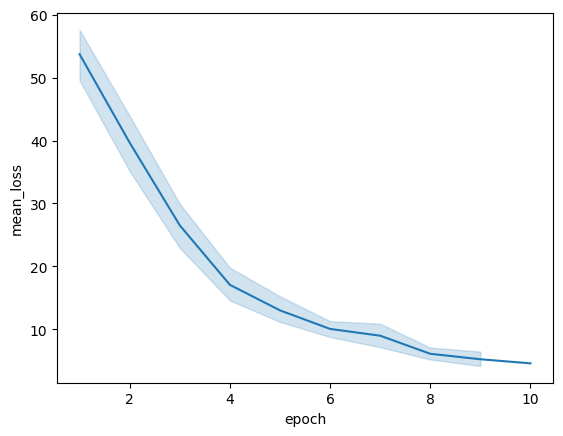

In [56]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')

In [57]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [66]:
# Attach your model (assumes 'name' contains your tuned model ID)
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

# Define input variable
scientific_name = "Mentha"

# Build the prompt with instruction + input variable
input_prompt = (
    "Respond only with a JSON object using these keys: "
    "identifiedName, ScientificName, commonName, Description, Habitat, Characteristics, conservationStatus, PrimaryImage.\n"
    f"{scientific_name}"
)

# Generate output
response = model.generate_content(input_prompt)
print(response.text)  # Should be a JSON object as a string!


{"identifiedName": "Mint", "ScientificName": "Mentha", "commonName": "Mint", "Description": "Aromatic herb with various species.", "Habitat": "Moist areas, cultivated worldwide.", "Characteristics": "Square stem, aromatic leaves.", "conservationStatus": "Least Concern", "PrimaryImage": "https://upload.wikimedia.org/wikipedia/commons/e/e7/Mentha_crispa_flower.jpg"}


In [67]:
import re

def extract_json(text):
    # Find the first {...} block in the text
    match = re.search(r'\{.*\}', text, re.DOTALL)
    if match:
        return json.loads(match.group(0))
    return None

parsed = extract_json(response.text)
print(parsed['Description'])


Aromatic herb with various species.
